In [2]:
#Gradient Descent for finding relationships between MPG and related stats in old cars 
#Things I've learned:
#Keep weights and learning rate small
#

#Dependencies
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Get Data: (n,1) ndarray
mpg = np.genfromtxt('mpg.txt',usecols = (0))
acc = np.genfromtxt('mpg.txt',usecols = (5))

def mn(itera):
    l = itera
    s = max(l) - min(l)
    av = sum(l)/ len(l)
    return((l - av)/ s)

mpg_mn = mn(mpg)
acc_mn = mn(acc)

print(mpg.shape)
print(acc.shape)

(398,)
(398,)


In [3]:
#Error Math
def error(w0, w1, x, y):
	er = 0
	for i in range(len(mpg)):
		er += abs(y[i] - (w0 + w1 * x[i]))
	return er/len(mpg)




In [4]:
np.random.seed(0)
# sw0 = 0.0
# while abs(sw0) < 50:
sw0 = 1* (2 * np.random.random((1,)) - 1)
w0 = np.asscalar(sw0)

# sw1 = 0.0
# while abs(sw1) < 50:
sw1 = 1* (2 * np.random.random((1,)) - 1)
w1 = np.asscalar(sw1)

y = mpg

starting_error = error(w0,w1, acc, y)



#Gradient Descent
lr = .001
m = len(mpg)



for i in range(1000):
    d0 = 0
    d1 = 0
    #if (i == 1) or (i % 50 == 0):
    #print('Error:')
    #print(error(w0,w1, acc, y))
    #print('\nWeights:')
    #print(w0, w1)
    #print(w0.shape)
    if (i in range(0,15) ) or (i % 100 == 0 ):
        print('Error:')
        print(error(w0,w1, acc, y))
        print('Weights:')
        print(w0, w1)
        print('Derivatives')
    for j in range(len(acc)):
        d0 += (- ( y[j] - (w1 * acc[j] + w0)))
        d1 += (-acc[j] * ( y[j] - (w1 * acc[j] + w0)))
    if (i in range(0,15) ) or (i % 100 == 0 ):
        print(d0,d1)
    w0 +=  (w0 - lr * d0) * (m**-1) 
    w1 +=  (w1 - lr * d1) * (m**-1) 

Error:
16.7167708164
Weights:
(0.0976270078546495, 0.43037873274483895)
Derivatives
(-6653.2747849135576, -105875.81164729757)
Error:
12.5646457104
Weights:
(0.11458907266059978, 0.69747971359921679)
Derivatives
(-4991.5394956489736, -79199.355174600787)
Error:
9.57731699147
Weights:
(0.12741854142519671, 0.89822552990122684)
Derivatives
(-3742.5922146917783, -59149.554272349276)
Error:
7.67644574123
Weights:
(0.13714218654106849, 1.0490993484998463)
Derivatives
(-2803.8929365167564, -44080.292122579529)
Error:
6.67609279038
Weights:
(0.1445317220261384, 1.1624897793317039)
Derivatives
(-2098.3734529164249, -32754.361130061734)
Error:
6.1590096415
Weights:
(0.15016716216418505, 1.247707997697014)
Derivatives
(-1568.1099449281849, -24241.88644205685)
Error:
5.91716560814
Weights:
(0.1544844413277337, 1.311752204832074)
Derivatives
(-1169.5673559915483, -17843.981917637746)
Error:
5.79651471164
Weights:
(0.15781120463758114, 1.3598821900644102)
Derivatives
(-870.02510269615004, -13035.37

In [5]:
print('Final Values')
print('Starting Error:')
print(starting_error)
print('Error after Gradient Descent:')
print(error(w0,w1, acc, y))

print('\nStarting Weights:')
print(sw0, sw1)
print('Weights after Gradient Descent:')
print(w0, w1)

Final Values
Starting Error:
16.7167708164
Error after Gradient Descent:
5.81237169331

Starting Weights:
(array([ 0.09762701]), array([ 0.43037873]))
Weights after Gradient Descent:
(1.585116557158543, 1.4172228833567517)


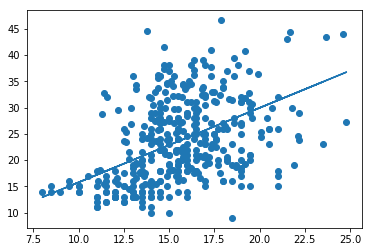

In [6]:
#Output

xplt = acc
yplt = w0 + xplt *w1

plt.scatter(xplt, y)
plt.plot(xplt, yplt)
#plt.axis([min(acc) - 5,max(acc)+ 5,min(yplt) - 10,max(yplt) + 10])
plt.show()


In [61]:
w0 = np.asscalar(sw0)
w1 = np.asscalar(sw1)
print(w0)
w0 += (m**-1) * (w0 - .001 * (-1 * ( y[0] - (w1 * acc[0] + w0))))
print(w0)
print((m**-1) * (w0 - .001 * (-1 * ( y[0] - (w1 * acc[0] + w0)))))
print(w1, y[0])

0.0976270078546
0.0979043064377
0.000277994616428
(0.43037873274483895, 18.0)


ImportError: cannot import name __check_build

In [ ]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(mpg, acc)
print(regr.coef_)

plt.scatter(mpg, acc)
plt.plot(mpg, regr.predict(mpg))